<a href="https://colab.research.google.com/github/yasminmohamed22/ml2/blob/main/assignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import os
from sklearn.model_selection import KFold

In [192]:
data=pd.read_csv("/content/house_prices_data_training_data.csv")
datacopy = data
data = data.dropna()
data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,6.414100e+09,20150108T000000,320000.0,2.0,1.00,1802.0,11225.0,1.0,0.0,0.0,3.0,7.0,1802.0,0.0,1961.0,0.0,98125.0,47.7205,-122.323,1810.0,7332.0
17995,1.346300e+09,20140626T000000,1990000.0,5.0,3.00,4480.0,5000.0,2.5,0.0,0.0,5.0,12.0,3420.0,1060.0,1902.0,0.0,98112.0,47.6275,-122.315,3220.0,5600.0
17996,2.212210e+09,20140702T000000,253000.0,2.0,1.00,1310.0,7128.0,1.0,0.0,0.0,4.0,7.0,940.0,370.0,1980.0,0.0,98031.0,47.3958,-122.189,1400.0,7161.0
17997,2.050004e+08,20140915T000000,630000.0,3.0,2.50,2320.0,32772.0,2.0,0.0,0.0,3.0,9.0,2320.0,0.0,1992.0,0.0,98053.0,47.6304,-121.988,2610.0,33305.0


In [193]:
y=data.price
x=data.drop('price',axis=1)
x=data.drop('date',axis=1)
datacopy = datacopy.drop('date',axis=1)
datacopy = datacopy.drop('id', axis=1)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [195]:
print(X_train)

                 id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
7797   9.432900e+09  325000.0       4.0  ... -122.009         2270.0      8770.0
56     9.478501e+09  292500.0       4.0  ... -122.114         2250.0      4500.0
3224   7.885801e+09  270000.0       4.0  ... -122.153         3010.0      5772.0
15330  9.536600e+09  520000.0       4.0  ... -122.325         1940.0      8402.0
15353  6.442100e+08  780000.0       4.0  ... -122.192         2600.0     11556.0
...             ...       ...       ...  ...      ...            ...         ...
15168  8.835800e+09  316000.0       1.0  ... -121.768         1780.0     21094.0
4745   1.180500e+09  353000.0       4.0  ... -122.230         1910.0      7210.0
17458  1.180005e+09  463000.0       4.0  ... -122.229         2230.0      6000.0
5921   7.802900e+09  335000.0       2.0  ... -121.838         1460.0     69260.0
12746  4.077800e+09  518000.0       4.0  ... -122.283         1590.0      8100.0

[11519 rows x 20 columns]


In [196]:
def  featureNormalize(X_train):
    mu = np.mean(X_train, axis=0);
    sigma = np.std(X_train, axis=0);
    X_norm = (X_train - mu) / sigma
    return X_norm

X_norm = featureNormalize(X_train)


In [197]:
m = np.size(X_train,0) 


allones = np.ones(X_train.shape[0])
X_norm['x0'] = allones
print("X_normmm:")
print(X_norm)

X_normmm:
             id     price  bedrooms  ...  sqft_living15  sqft_lot15   x0
7797   1.703829 -0.571564  0.709960  ...       0.438918   -0.162514  1.0
56     1.719797 -0.659925  0.709960  ...       0.409240   -0.319780  1.0
3224   1.162077 -0.721099  0.709960  ...       1.537006   -0.272931  1.0
15330  1.740141 -0.041398  0.709960  ...      -0.050770   -0.176067  1.0
15353 -1.373731  0.665490  0.709960  ...       0.928606   -0.059904  1.0
...         ...       ...       ...  ...            ...         ...  ...
15168  1.494741 -0.596034 -2.587191  ...      -0.288194    0.291384  1.0
4745  -1.185937 -0.495438  0.709960  ...      -0.095287   -0.219969  1.0
17458 -1.186110 -0.196370  0.709960  ...       0.379562   -0.264534  1.0
5921   1.133047 -0.544376 -1.488140  ...      -0.763043    2.065358  1.0
12746 -0.171381 -0.046836  0.709960  ...      -0.570136   -0.187190  1.0

[11519 rows x 21 columns]


In [198]:
def computeCost(X, y, theta):
    J = (np.dot(((np.dot(X, theta) - y).T), (np.dot(X, theta) - y))) / 2 * m
    return J

In [199]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha/m)*(np.dot(X,theta.T)-y).dot(X)
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [200]:
alpha = 0.01
num_iters = 700
theta = np.zeros(np.size(X_norm,1)) 

In [201]:
theta1, J_history = gradientDescent(X_norm, y_train, theta, alpha, num_iters)
#1st hypothesis

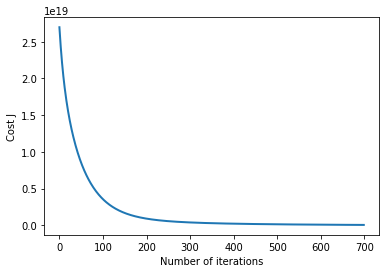

In [202]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
pyplot.show()
# convergence graph


In [203]:
X_norm["bedrooms"] = np.square(X_norm["bedrooms"])
theta2, J_history = gradientDescent(X_norm, y_train, theta, alpha, num_iters)
#2nd hypothesis

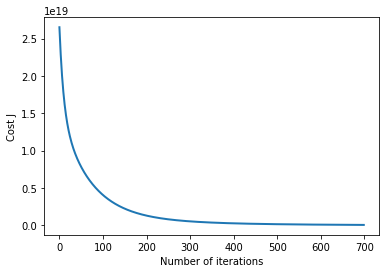

In [204]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
pyplot.show()
#convergence graph

In [205]:
X_norm["sqft_lot15"] = np.square(X_norm["sqft_lot15"])
theta3, J_history = gradientDescent(X_norm, y_train, theta, alpha, num_iters)
#3rd HYPOTHESIS

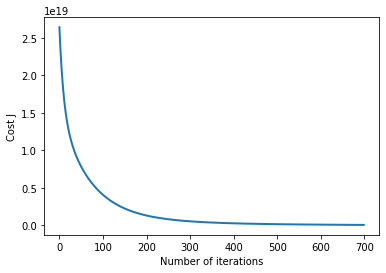

In [206]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
pyplot.show()
# convergence graph

In [207]:
print('theta1 computed from gradient descent: {:s}'.format(str(theta1)))
print('theta2 computed from gradient descent: {:s}'.format(str(theta2)))
print('theta3 computed from gradient descent: {:s}'.format(str(theta3)))


theta1 computed from gradient descent: id                 -450.218671
price            312748.716488
bedrooms         -10893.825958
bathrooms          4735.988164
sqft_living       16312.134665
sqft_lot           1619.433269
floors            -1002.043815
waterfront         9221.586376
view               4653.344219
condition          2638.869222
grade             20543.403239
sqft_above        15858.271174
sqft_basement      4354.042763
yr_built         -17407.580916
yr_renovated        205.481832
zipcode           -9364.091231
lat               14577.644345
long              -5838.797220
sqft_living15      -707.168085
sqft_lot15        -3468.726374
x0               534755.485526
Name: price, dtype: float64
theta2 computed from gradient descent: id                 -527.566334
price            313992.817706
bedrooms           1680.116585
bathrooms          -145.897074
sqft_living       10128.057728
sqft_lot           1913.351667
floors            -1267.417914
waterfront         9651.49

In [208]:
X_normval = featureNormalize(X_val)
allones = np.ones(X_val.shape[0])
X_normval ['x0'] = allones

print("Validation :")
#VALIDATION theta1
J1 = computeCost(X_normval, y_val, theta1)
print("J1",J1)

#VALIDATION theta2
X_normval["bedrooms"] = np.square(X_normval["bedrooms"])
J2 = computeCost(X_normval, y_val, theta2)
print("J2",J2)

#VALIDATION theta3
X_normval["sqft_lot15"] = np.square(X_normval["sqft_lot15"])
J3 = computeCost(X_normval, y_val, theta3)
print("J3",J3)

Validation :
J1 2.011634422453688e+16
J2 1.994286460212963e+16
J3 1.9831734600179532e+16


In [209]:
X_normtest = featureNormalize(X_test)
allones = np.ones(X_test.shape[0])
X_normtest ['x0'] = allones

print("Test :")
#TESTTT theta1
J4 = computeCost(X_normtest, y_test, theta)
print("J4",J4)
#TESTTT theta2
X_normtest["bedrooms"] = np.square(X_normtest["bedrooms"])
J5 = computeCost(X_normtest, y_test, theta2)
print("J5",J5)
#TESTTT theta3
X_normtest["sqft_lot15"] = np.square(X_normtest["sqft_lot15"])
J6 = computeCost(X_normtest, y_test, theta3)
print("J6",J6)

Test :
J4 8.208082287709699e+18
J5 2.9968289279477108e+16
J6 3.0297619581220904e+16
